In [1]:
import configparser, time, re
config = configparser.ConfigParser()
config.read('hometemp.ini')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from persist.database import DwDDataHandler, SensorDataHandler
from api.fetcher import DWDFetcher
from visualize.plots import draw_plots

auth = config["db"]

dwd_handler = DwDDataHandler(auth['db_port'], auth['db_host'], auth['db_user'], auth['db_pw'], 'dwd_data')
dwd_handler.init_db_connection()
dwd_df = dwd_handler.read_data_into_dataframe()
dwd_df = dwd_df.sort_values(by='id')

dwd_df

INFO:persistence:Connected to the database!


,id,timestamp,temp,temp_dev
25,1,2023-09-10 16:00:00+00:00,28.2,11.0
0,2,2023-09-10 17:00:00+00:00,27.0,11.0
1,3,2023-09-10 18:00:00+00:00,25.1,11.0
2,4,2023-09-10 19:00:00+00:00,23.0,10.0
3,5,2023-09-10 20:00:00+00:00,21.2,12.0
4,6,2023-09-10 21:00:00+00:00,20.0,11.0
5,7,2023-09-10 22:00:00+00:00,19.0,12.0
6,8,2023-09-10 23:00:00+00:00,18.1,10.0
7,9,2023-09-11 00:00:00+00:00,17.7,9.0
8,10,2023-09-11 01:00:00+00:00,16.9,9.0


In [2]:
handler = SensorDataHandler(auth['db_port'], auth['db_host'], auth['db_user'], auth['db_pw'], 'sensor_data')
handler.init_db_connection(check_table=False)
df = handler.read_data_into_dataframe()
df['timestamp'] = df['timestamp'].map(lambda x : datetime.strptime(str(x).strip(), '%Y-%m-%d %H:%M:%S'))
df = df.sort_values(by='timestamp')
df = df.reset_index()
#print(str(df['timestamp'][0].month), str(df['timestamp'][0].day))

df

INFO:persistence:Connected to the database!


,index,id,timestamp,humidity,room_temp,cpu_temp
0,4,6481,2023-08-12 11:32:54,69.500000,21.000000,37.500
1,116,6482,2023-08-12 11:42:55,70.000000,21.100000,37.500
2,232,6483,2023-08-12 11:53:01,69.800000,21.100000,36.500
3,349,6484,2023-08-12 12:03:03,69.500000,21.100000,36.500
4,466,6485,2023-08-12 12:13:04,69.500000,21.100000,36.000
...,...,...,...,...,...,...
4215,4215,10696,2023-09-11 18:00:24,65.900002,23.299999,41.868
4216,4216,10697,2023-09-11 18:10:28,65.699997,23.400000,43.816
4217,4217,10698,2023-09-11 18:20:37,65.500000,23.400000,45.277
4218,4218,10699,2023-09-11 18:30:39,65.500000,23.500000,42.355


In [3]:
# measurement data collection started on 12th august 2023, 11 hours 32 minutes 54 seconds
assert df['timestamp'][0].day == 12 and df['timestamp'][0].month == 8 and df['timestamp'][0].year == 2023 and df['timestamp'][0].hour == 11 and df['timestamp'][0].minute == 32 and df['timestamp'][0].second == 54

In [4]:
df[["humidity", "room_temp", "cpu_temp"]].describe()

,humidity,room_temp,cpu_temp
count,4220.000000,4220.000000,4220.000000
mean,63.099123,21.620118,36.806473
std,4.948856,3.067313,3.316031
min,39.599998,14.700000,28.232000
25%,60.299999,19.200001,34.076000
50%,63.100000,21.299999,36.511000
75%,65.900002,24.000000,39.433000
max,78.199997,28.200001,47.225000


In [5]:
corr_matrix = df[["humidity", "room_temp", "cpu_temp"]].corr()
#corr_matrix = df[["humidity", "room_temp"]].corr()
corr_matrix

,humidity,room_temp,cpu_temp
humidity,1.000000,-0.058629,-0.096418
room_temp,-0.058629,1.000000,0.931626
cpu_temp,-0.096418,0.931626,1.000000


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

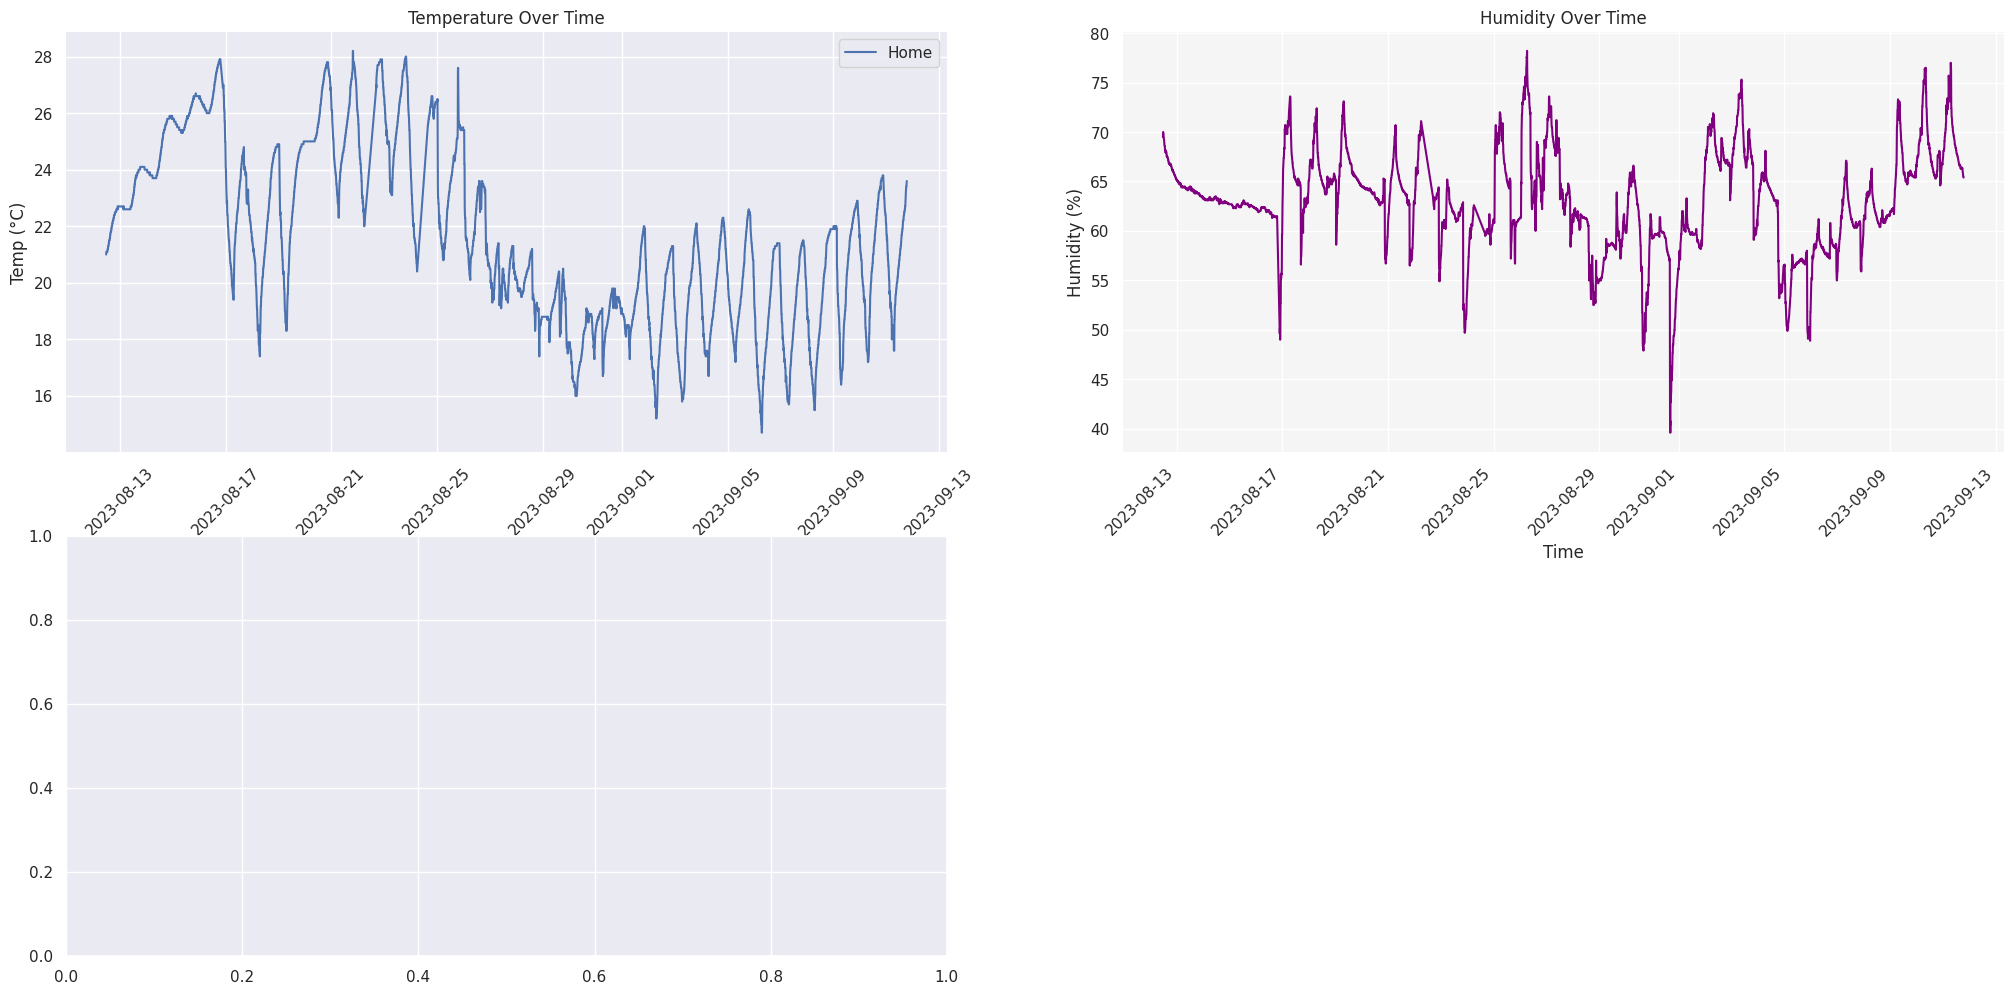

In [7]:
draw_plots(df,temp_outside=dwd_df, with_save=False)

In [ ]:
plt.figure(figsize=(25, 8))
sns.lineplot(label="CPU", x="timestamp", y="cpu_temp", data=df)
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temp (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 8))
sns.lineplot(label="CPU", x="timestamp", y="cpu_temp",marker='o',markersize=6, data=df[df["timestamp"] >= datetime.now() - timedelta(hours=25)])
plt.title("Temperature Last 24h")
plt.xlabel("Time")
plt.ylabel("Temp (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
csv_file = 'fitness.csv'  
fitness = pd.read_csv(csv_file, parse_dates=['time'])
fitness.describe()

In [ ]:
def plot_fitness(fitness):
    plt.figure(figsize=(25, 10))

    # Visualization 1: Line plot for weight over time
    plt.subplot(2, 2, 1)
    sns.lineplot(data=fitness, x='time', y='weight')
    plt.xticks(rotation=45)
    plt.title('Weight over Time')

    # Visualization 2: Line plot for BMI over time
    plt.subplot(2, 2, 2)
    sns.lineplot(data=fitness, x='time', y='bmi')
    plt.xticks(rotation=45)
    plt.title('BMI over Time')

    # Visualization 3: Line plot for body fat over time
    plt.subplot(2, 2, 3)
    sns.lineplot(data=fitness, x='time', y='body_fat')
    plt.xticks(rotation=45)
    plt.title('Body Fat over Time')

    # Visualization 4: Line plot for muscle over time
    plt.subplot(2, 2, 4)
    sns.lineplot(data=fitness, x='time', y='muscle')
    plt.xticks(rotation=45)
    plt.title('Muscle over Time')

    plt.tight_layout()
    plt.show()

def plot_fitness_corr(fitness):
    correlation_matrix = fitness[["weight", "bmi", "body_fat", "muscle", "kcal", "visceral"]].corr()
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()

#plot_fitness(fitness)
#plot_fitness_corr(fitness)